In [1]:
import matplotlib.pyplot as plt
import numpy as np

from segment_anything import SamPredictor, sam_model_registry

from PIL import Image

from lynx_id.data.dataset import LynxDataset
from pathlib import Path

In [2]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))  

In [7]:
sam = sam_model_registry["vit_h"](checkpoint="/gpfswork/rech/ads/commun/segment_anything/sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)

(3000, 4000, 3) 0.959


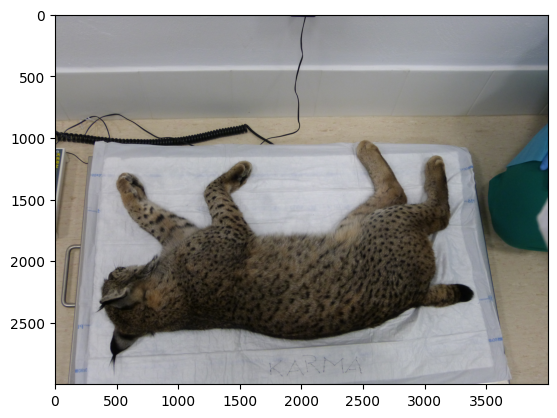

In [66]:
lynxDataset = LynxDataset(Path("/gpfsscratch/rech/ads/commun/datasets/extracted/spain/lynx_dataset_spain.csv"), probabilities=[1,0,0])

idx = 708

image = lynxDataset[idx][0]['image']
conf = lynxDataset[idx][0]['conf']
x = lynxDataset[idx][0]['x']
y = lynxDataset[idx][0]['y']
width = lynxDataset[idx][0]['width']
height = lynxDataset[idx][0]['height']
plt.imshow(image)

print(image.shape, conf)

In [67]:
predictor.set_image(image)

In [68]:
input_box = np.array([x, y, x+width, y+height])

In [69]:
masks, scores, logits = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)

In [70]:
print(masks.shape, scores.shape, logits.shape)

(1, 3000, 4000) (1,) (1, 256, 256)


In [71]:
image.shape

(3000, 4000, 3)

In [77]:
scores[0]

0.38638952

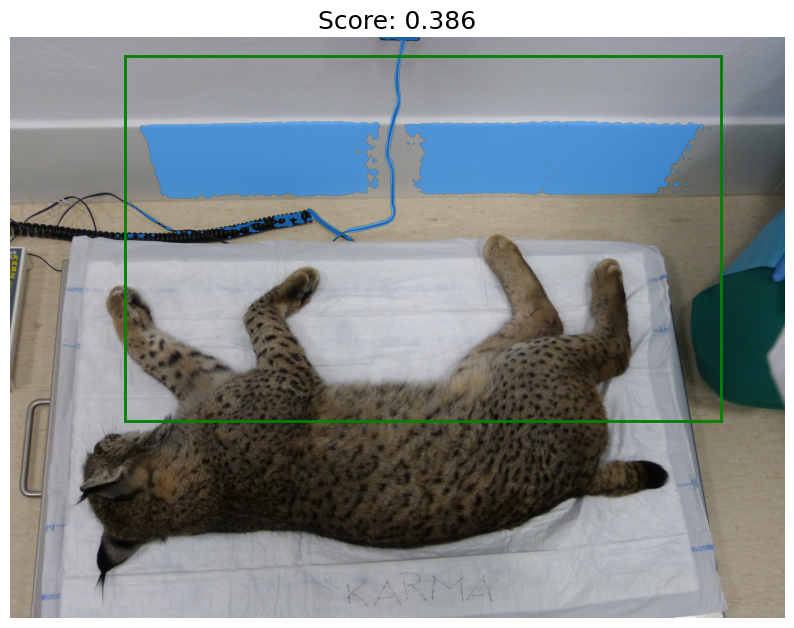

In [73]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.title(f"Score: {scores[0]:.3f}", fontsize=18)
plt.axis('off')
plt.show()

In [74]:
mask = masks[0]

In [75]:
image_masque = image.copy()
image_masque[~mask, :] = 0
image_masque = image_masque[int(y):int(y)+int(height), int(x):int(x)+int(width), :]

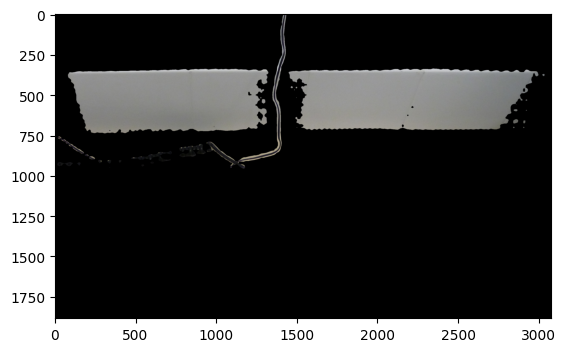

In [76]:
plt.imshow(image_masque)